In [27]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def get_tempo(y, sr):
    tempo = librosa.feature.tempo(y=y, sr=sr)
    return tempo

In [3]:
def get_short_time_energy(y, hop_length=256, frame_length=256):
    ste = np.array([
        sum(abs(y[j:j+frame_length] ** 2) / frame_length)
        for j in range(0, len(y), hop_length)
    ])
    ste_feature = np.hstack([ste.mean(), ste.std()])
    
    return ste_feature

In [4]:
def get_root_mean_square_energy(y, hop_length=512, frame_length=512):
    rms = librosa.feature.rms(y=y)
    rms_feature = np.hstack([rms.mean(), rms.std()])
    
    return rms_feature

In [5]:
def get_zcr(y):
    zcr = librosa.feature.zero_crossing_rate(y)
    zcr_feature = np.hstack([zcr.mean(), zcr.std()])
    
    return zcr_feature

In [6]:
def get_spectral_centroid(y, sr):
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    centroid_feature = np.hstack([centroid.mean(), centroid.std()])
    
    return centroid_feature

In [7]:
def get_spectral_bandwidth(y, sr):
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    bandwidth_feature = np.hstack([bandwidth.mean(), bandwidth.std()])
    
    return bandwidth_feature

In [8]:
def get_spectral_rolloff(y, sr):
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_feature = np.hstack([rolloff.mean(), rolloff.std()])
    
    return rolloff_feature

In [9]:
def get_spectral_contrast(y, sr):
    stft = np.abs(librosa.stft(y))
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sr)
    contrast_mean = contrast.mean(axis=1)
    contrast_std = contrast.std(axis=1)
    contrast_feature = np.hstack([contrast_mean, contrast_std])
    
    return contrast_feature

In [10]:
def get_mfcc(y, sr, n_mfcc=20):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    mfcc_mean = mfcc.mean(axis=1)
    mfcc_std = mfcc.std(axis=1)
    mfcc_feature = np.hstack([mfcc_mean, mfcc_std])
    
    return mfcc_feature

In [11]:
def get_chroma(y, sr):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = chroma.mean(axis=1)
    chroma_std = chroma.std(axis=1)
    chroma_feature = np.hstack([chroma_mean, chroma_std])
    
    return chroma_feature

In [16]:
root_directory = "../full_songs"
genre_directories = [f.path for f in os.scandir(root_directory) if f.is_dir()]

files_per_genre = 20
n_samples = 5
total_samples = len(genre_directories) * files_per_genre * n_samples
i_total_sample = 0

genre_labels = []
feature_labels = ['Tempo', 'STE_mean', 'STE_std', 'RMS_mean', 'RMS_std', 'ZCR_mean', 'ZCR_std', 'Centroid_mean',
                 'Centroid_std', 'Bandwidth_mean', 'Bandwidth_std', 'Roll-off_mean', 'Roll-off_std', 'Contrast0_mean',
                 'Contrast1_mean', 'Contrast2_mean', 'Contrast3_mean', 'Contrast4_mean', 'Contrast5_mean',
                 'Contrast6_mean', 'Contrast0_std', 'Contrast1_std', 'Contrast2_std', 'Contrast3_std',
                 'Contrast4_std', 'Contrast5_std', 'Contrast6_std', 'MFCC0_mean', 'MFCC1_mean', 'MFCC2_mean',
                 'MFCC3_mean', 'MFCC4_mean', 'MFCC5_mean', 'MFCC6_mean', 'MFCC7_mean', 'MFCC8_mean',
                 'MFCC9_mean', 'MFCC10_mean', 'MFCC11_mean', 'MFCC12_mean', 'MFCC13_mean', 'MFCC14_mean',
                 'MFCC15_mean', 'MFCC16_mean', 'MFCC17_mean', 'MFCC18_mean', 'MFCC19_mean', 'MFCC0_std',
                 'MFCC1_std', 'MFCC2_std', 'MFCC3_std', 'MFCC4_std', 'MFCC5_std', 'MFCC6_std', 'MFCC7_std',
                 'MFCC8_std', 'MFCC9_std', 'MFCC10_std', 'MFCC11_std', 'MFCC12_std', 'MFCC13_std', 'MFCC14_std',
                 'MFCC15_std', 'MFCC16_std', 'MFCC17_std', 'MFCC18_std', 'MFCC19_std', 'Chroma0_mean',
                 'Chroma1_mean', 'Chroma2_mean', 'Chroma3_mean', 'Chroma4_mean', 'Chroma5_mean', 'Chroma6_mean',
                 'Chroma7_mean', 'Chroma8_mean', 'Chroma9_mean', 'Chroma10_mean', 'Chroma11_mean', 'Chroma0_std',
                 'Chroma1_std', 'Chroma2_std', 'Chroma3_std', 'Chroma4_std', 'Chroma5_std', 'Chroma6_std',
                 'Chroma7_std', 'Chroma8_std', 'Chroma9_std', 'Chroma10_std', 'Chroma11_std']
feature_matrix = np.zeros((total_samples, len(feature_labels)))

for genre_directory in genre_directories:
    genre_label = os.path.basename(genre_directory)
    files = [os.path.join(genre_directory, f) for f in os.listdir(genre_directory) if os.path.isfile(os.path.join(genre_directory, f))]
    
    for file in files:
        y, sr = librosa.load(file)

        y_trim, _ = librosa.effects.trim(y, top_db=40)

        sample_length_seconds = 20
        sample_length = int(sample_length_seconds * sr)
        total_length = y_trim.shape[0]

        start = 0
        end = sample_length
        i_sample = 1

        while (end < total_length) & (i_sample <= n_samples):
            sample = y_trim[start:end]

            tempo = get_tempo(sample, sr)
            ste = get_short_time_energy(sample)
            rms = get_root_mean_square_energy(sample)
            zcr = get_zcr(sample)
            centroid = get_spectral_centroid(sample, sr)
            bandwidth = get_spectral_bandwidth(sample, sr)
            rolloff = get_spectral_rolloff(sample, sr)
            contrast = get_spectral_contrast(sample, sr)
            mfcc = get_mfcc(sample, sr)
            chroma = get_chroma(sample, sr)

            feature_vector = np.hstack([tempo, ste, rms, zcr, centroid, bandwidth, rolloff, contrast, mfcc, chroma])

            feature_matrix[i_total_sample] = feature_vector

            genre_labels.append(genre_label)

            start = end
            end += sample_length
            i_sample += 1
            i_total_sample += 1

df = pd.DataFrame(feature_matrix, columns=feature_labels)
df['Genre'] = genre_labels

In [18]:
df

Tempo  STE_mean   STE_std  RMS_mean   RMS_std  ZCR_mean   ZCR_std  \
0    117.453835  0.002751  0.003669  0.046543  0.024123  0.084384  0.031907   
1    129.199219  0.002129  0.004041  0.036369  0.028344  0.073145  0.035295   
2    117.453835  0.003823  0.004734  0.055187  0.027815  0.087358  0.027223   
3    117.453835  0.002063  0.003362  0.037143  0.026085  0.081553  0.035328   
4    117.453835  0.003401  0.006337  0.048839  0.031819  0.081016  0.030548   
..          ...       ...       ...       ...       ...       ...       ...   
995  117.453835  0.000897  0.001013  0.027252  0.012401  0.083298  0.083506   
996  112.347147  0.003726  0.005746  0.052904  0.030249  0.130991  0.089015   
997  112.347147  0.008230  0.009005  0.083802  0.034463  0.110362  0.070704   
998  112.347147  0.009125  0.010815  0.080758  0.050920  0.103980  0.071622   
999  112.347147  0.007211  0.007617  0.078509  0.032134  0.098358  0.045432   

     Centroid_mean  Centroid_std  Bandwidth_mean  ...  Chroma3_std  \
0      1727.529519    662.830428     1796.181165  ...     0.184830   
1      1662.007492    623.339242     1851.467546  ...     0.157749   
2      1772.144912    565.937869     1780.848549  ...     0.177687   
3      1626.964701    560.037952     1726.384376  ...     0.175896   
4      1678.423017    618.512557     1778.342438  ...     0.187950   
..             ...           ...             ...  ...          ...   
995    1937.785251   1083.677634     2196.282368  ...     0.270597   
996    2390.978116    904.921091     2318.660301  ...     0.245139   
997    2285.623414    851.958327     2398.924652  ...     0.234178   
998    2311.378144    920.178320     2448.497555  ...     0.250437   
999    2174.438661    640.566240     2353.112593  ...     0.229032   

     Chroma4_std  Chroma5_std  Chroma6_std  Chroma7_std  Chroma8_std  \
0       0.251512     0.351089     0.188364     0.323224     0.192700   
1       0.278516     0.328153     0.221604     0.418387     0.204494   
2       0.215747     0.358452     0.233619     0.345665     0.211821   
3       0.229170     0.333000     0.220233     0.410388     0.211764   
4       0.220705     0.366815     0.208286     0.339201     0.195336   
..           ...          ...          ...          ...          ...   
995     0.249618     0.201180     0.218825     0.296483     0.250044   
996     0.299612     0.255700     0.311576     0.299202     0.281669   
997     0.298793     0.273454     0.268735     0.284133     0.261495   
998     0.296773     0.273114     0.302739     0.316697     0.278483   
999     0.315809     0.251165     0.298704     0.295040     0.264401   

     Chroma9_std  Chroma10_std  Chroma11_std  Genre  
0       0.382898      0.313732      0.180709  choir  
1       0.344287      0.273368      0.177349  choir  
2       0.359942      0.316724      0.215014  choir  
3       0.333863      0.271708      0.173406  choir  
4       0.373781      0.308540      0.195019  choir  
..           ...           ...           ...    ...  
995     0.375788      0.251644      0.231335   rock  
996     0.347076      0.229513      0.219875   rock  
997     0.313967      0.247654      0.283194   rock  
998     0.382496      0.263537      0.292721   rock  
999     0.353036      0.262494      0.302401   rock  

[1000 rows x 92 columns]

In [19]:
df.to_csv('music_data.csv', index=False)

In [21]:
# errors while reading a few of the mp3 files:
    # "LibsndfileError: Unspecified internal error."
file = "../broken/classical3.mp3"
print(file)
y, sr = librosa.load(file)

../broken/classical3.mp3


C:\Users\dirto\AppData\Local\Temp\ipykernel_19192\2702504757.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file)
D:\dirto\anaconda3\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


NoBackendError: 

In [22]:
# errors while reading a few of the mp3 files:
    # "LibsndfileError: Error opening '[...]': File does not exist or is not a regular file (possibly a pipe?)."
file = "../broken/choir20.mp3"
print(file)
y, sr = librosa.load(file)

../broken/choir20.mp3


C:\Users\dirto\AppData\Local\Temp\ipykernel_19192\3615679780.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file)


NoBackendError: 

<AxesSubplot:>

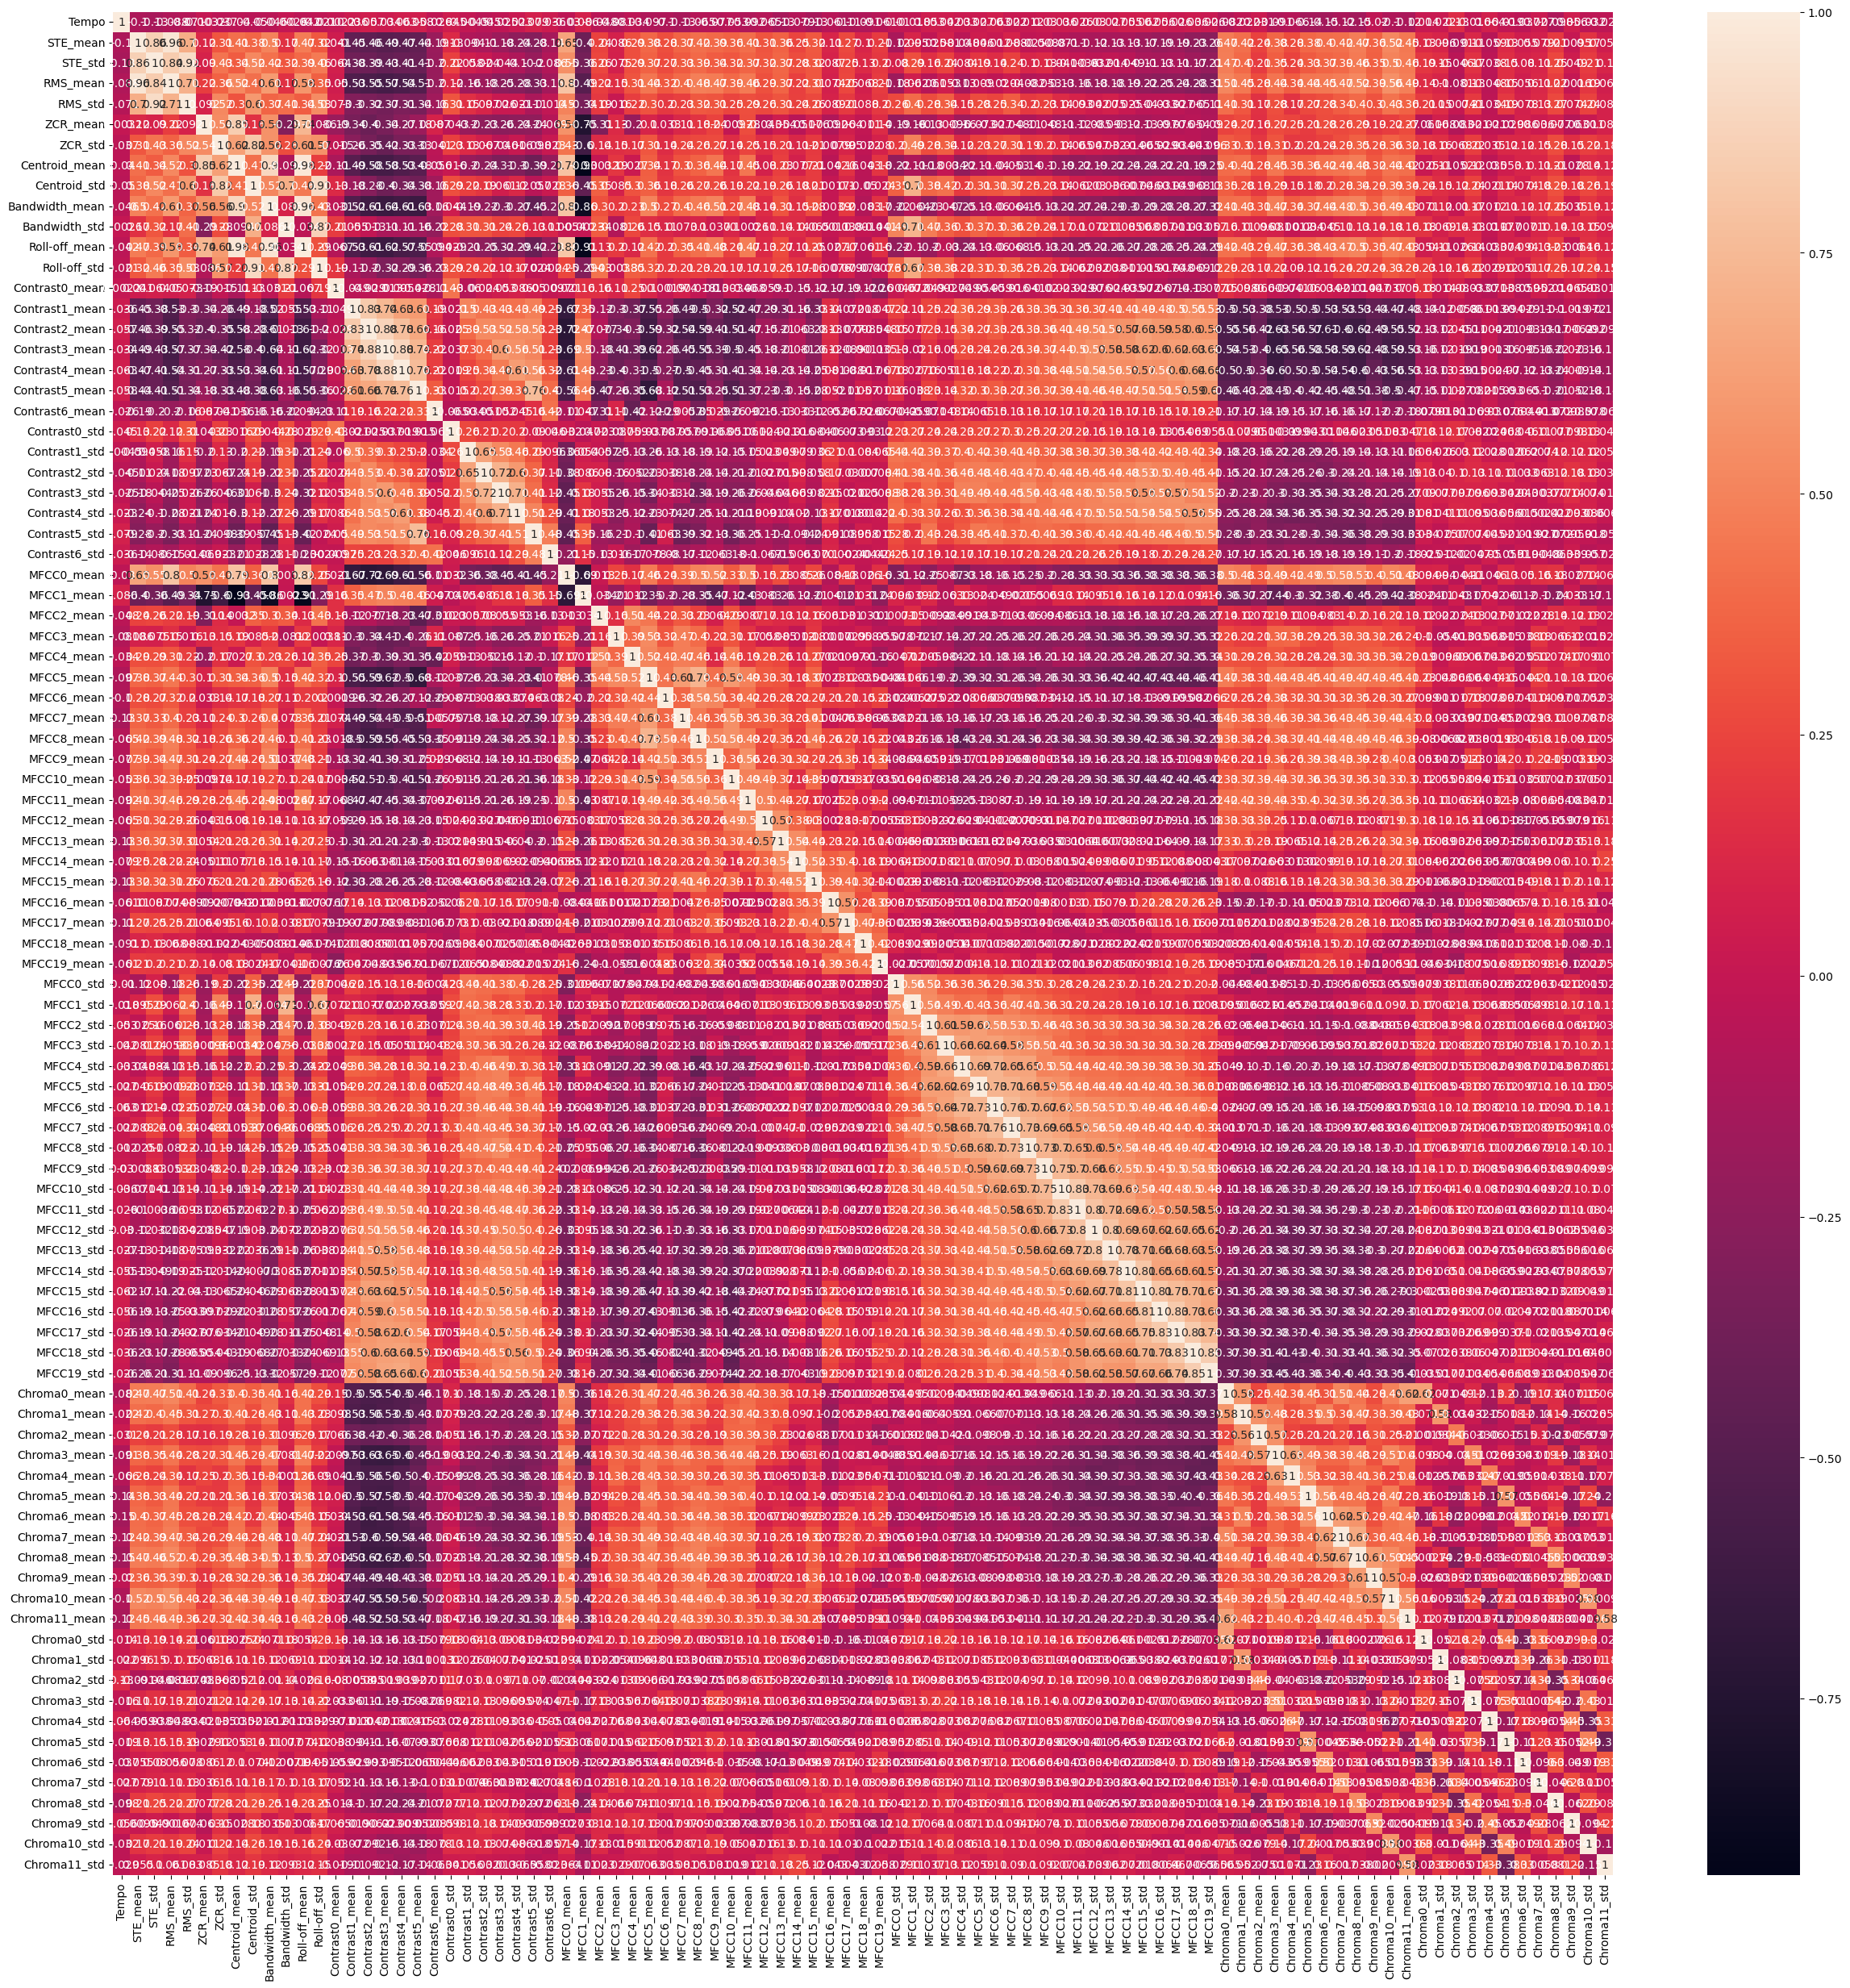

In [29]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df.corr(), annot=df.corr(), ax=ax)